### Importing dependencies

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading and derivating data for future analisys

In [2]:
# loading data

data = pd.read_csv('dataset_bacteria.csv')

data['volumecorpo'] = np.array(data['comprimentocorpo']) * np.pi*(np.array(data['larguracorpo'])/2)**2
data['volumeflagelo'] = np.array(data['comprimentoflagelo']) * np.pi*(np.array(data['larguraflagelo'])/2)**2

### Preparing training data

In [3]:
y = data.iloc[:,4].values
x = data.iloc[:,[2,3]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 0)

### Creating SVC Models and building analisys graphs (gamma variation = 0.05)

In [4]:
row = 0
scores = []
for n in range(0,20):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    svc = SVC(kernel='rbf', gamma = (n * 0.05) + 0.01)
    svc.fit(x_train,y_train)
    y_pred= svc.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    score = svc.score(x_test,y_test)
    scores.append(score)



### Ploting scores for gamma variation

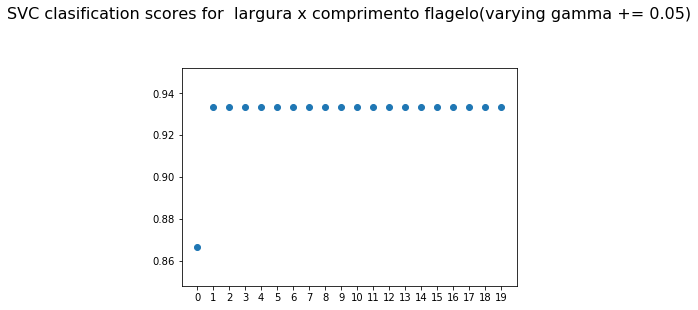

In [5]:
x_axis = [i for i in range(0,20)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for  largura x comprimento flagelo(varying gamma += 0.05)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that ant gamma, being gamma >= 0.1 (0.06, more precisely) , leads to the same score

### Creating SVC Models and building analisys graphs (gamma constant, C variation = 0.05)

In [6]:
row = 0
scores = []
for n in range(0,20):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    svc = SVC(kernel='rbf', gamma = 1, C = (n * 0.05) if n != 0 else (n * 0.05) + 0.01)
    
    svc.fit(x_train,y_train)
    y_pred= svc.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    score = svc.score(x_test,y_test)
    scores.append(score)
    
    print(n)
    print(n*0.05 + 0.01)
    print(score)
    print('_______')

0
0.01
0.222222222222
_______
1
0.06
0.955555555556
_______
2
0.11
0.933333333333
_______
3
0.16
0.933333333333
_______
4
0.21
0.933333333333
_______
5
0.26
0.933333333333
_______
6
0.31
0.933333333333
_______
7
0.36
0.933333333333
_______
8
0.41
0.933333333333
_______
9
0.46
0.933333333333
_______
10
0.51
0.933333333333
_______
11
0.56
0.933333333333
_______
12
0.61
0.933333333333
_______
13
0.66
0.933333333333
_______
14
0.71
0.933333333333
_______
15
0.76
0.933333333333
_______
16
0.81
0.933333333333
_______
17
0.86
0.933333333333
_______
18
0.91
0.933333333333
_______
19
0.96
0.933333333333
_______


### Ploting Score for C variation

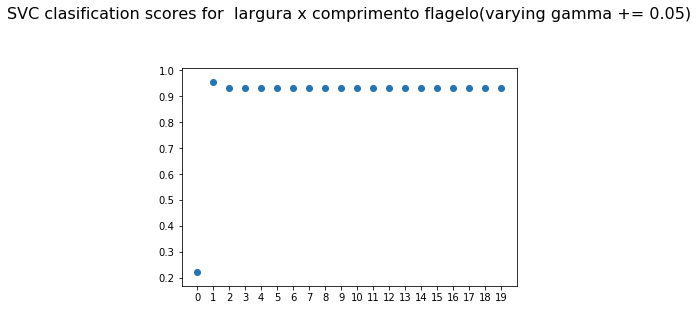

In [7]:
x_axis = [i for i in range(0,20)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for  largura x comprimento flagelo(varying gamma += 0.05)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that any C = 0.5 leads to the optimal result (score: 0.955), so, from now on, we will use C = 0.5

### Creating SVC Models and building analisys graphs (changing probability value)

In [8]:
#default way

svc = SVC(kernel='rbf', gamma = 1, C = 0.5, probability=False)

scores = []

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

In [9]:
#setting probability to true

svc = SVC(kernel='rbf', gamma = 1, C = 0.5, probability=True)

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

#print(scores)

### Ploting Score for probability variation

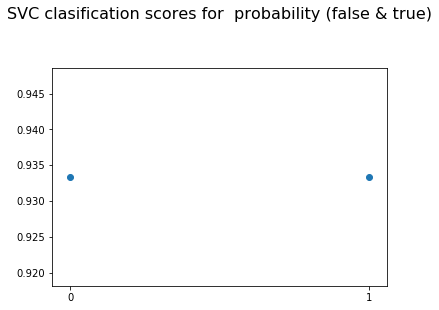

In [10]:
x_axis = [i for i in range(0,2)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for  probability (false & true)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that the probability attribute, being true or false, does not interfers in the score of the algorithm

### Creating SVC Models and building analisys graphs (changing shrinking value)

In [11]:
#default way

svc = SVC(kernel='rbf', gamma = 1, C = 0.5, probability=False, shrinking=True)

scores = []

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

In [12]:
#setting shrinking to false

svc = SVC(kernel='rbf', gamma = 1, C = 0.5, probability=False, shrinking= False)

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)


### Ploting score graph for shrinking variation

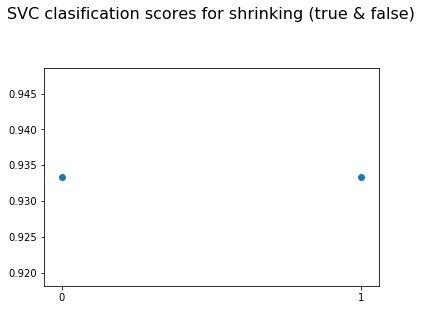

In [13]:
x_axis = [i for i in range(0,2)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for shrinking (true & false)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that changes in the 'shrinking' attribute does not affect the score 

## Conclusion

#### Through this demonstrations, we were able to conclude that the optimum parameters for this rbf kerneled svc is:

   * gamma >= 0.1 (auto = default in rbf kernel is **1/n_features**, in our case 0.25)
   * C = 0.5 (default is **1**)
   * probability = true or false (being true or false does not affect the score, by default is set as **false**)
   * shrinking = true or false (being true or false does not affect the score, by default is set as **true**)
    